In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

/tmp/ipykernel_3119/2410243975.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')

display(train.isnull().sum())
display(test.isnull().sum())
dataset = pd.concat([train, test], ignore_index=True)

# Cabin列をスラッシュで分割して新しい列として追加
dataset[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = dataset['Cabin'].str.split('/', expand=True)
# 元のCabin列を削除
dataset.drop(columns=['Cabin'], inplace=True)

display(dataset)
display(dataset.describe())
display(dataset.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,1496,S
12966,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,NaN
12967,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,296,P
12968,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,D,297,P


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


PassengerId        0
HomePlanet       288
CryoSleep        310
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
Cabin_deck       299
Cabin_num        299
Cabin_side       299
dtype: int64

In [3]:
# HomePlanet が何種類存在するか
display(dataset['HomePlanet'].value_counts())
display(dataset['Destination'].value_counts())
display(dataset['Cabin_deck'].value_counts())
display(dataset['Cabin_num'].value_counts())
display(dataset['Cabin_side'].value_counts())
display(dataset['HomePlanet'].value_counts().count())
display(dataset['Destination'].value_counts().count())
display(dataset['Cabin_deck'].value_counts().count())
display(dataset['Cabin_num'].value_counts().count())
display(dataset['Cabin_side'].value_counts().count())


HomePlanet
Earth     6865
Europa    3133
Mars      2684
Name: count, dtype: int64

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

Cabin_deck
F    4239
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

Cabin_num
82      34
4       28
56      28
31      27
230     27
        ..
1843     1
1849     1
1850     1
1851     1
1852     1
Name: count, Length: 1894, dtype: int64

Cabin_side
S    6381
P    6290
Name: count, dtype: int64

3

3

8

1894

2

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,...,False,False,False,False,False,True,False,False,False,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,...,True,False,False,False,False,False,False,False,False,True
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,True,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,True,34.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,...,False,False,False,False,False,False,True,False,False,True
12966,False,42.0,False,0.0,847.0,17.0,10.0,144.0,NaN,True,...,False,False,False,False,False,False,False,False,False,False
12967,True,NaN,False,0.0,0.0,0.0,0.0,0.0,NaN,False,...,False,False,False,True,False,False,False,False,True,False
12968,False,NaN,False,0.0,2680.0,0.0,0.0,523.0,NaN,False,...,False,False,False,True,False,False,False,False,True,False


<Axes: >

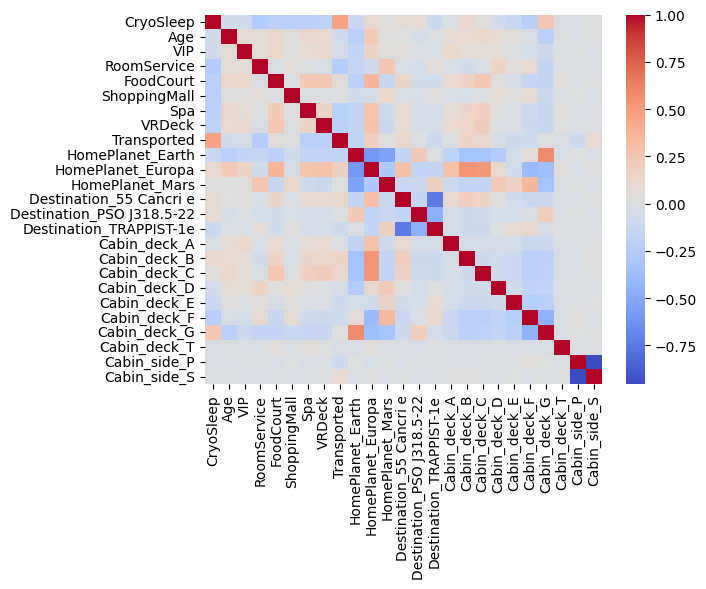

In [4]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cabin_deck', 'Cabin_side']
dataset_dummies = dataset[features]
dataset_dummies = pd.get_dummies(dataset_dummies, columns=['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side'])
display(dataset_dummies)

sns.heatmap(dataset_dummies.corr(), annot=False, color='blue', cmap='coolwarm')

features = []

In [5]:
for column in dataset_dummies.columns:
    if column == 'Transported':
        dataset_dummies[column] = dataset_dummies[column].astype('float64')
        continue
    if dataset_dummies[column].dtype == 'object':
        dataset_dummies[column] = dataset_dummies[column].astype('bool')
    if dataset_dummies[column].dtype == 'bool':
        dataset_dummies[column].fillna(True, inplace=True)
        dataset_dummies[column] = dataset_dummies[column].astype('float64')
    if dataset_dummies[column].dtype == 'float64':
        dataset_dummies[column].fillna(dataset_dummies[column].mean(), inplace=True)

display(dataset_dummies)

/tmp/ipykernel_3119/1266547069.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_dummies[column].fillna(True, inplace=True)
/tmp/ipykernel_3119/1266547069.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0.0,39.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,24.000000,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,58.000000,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,33.000000,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,16.000000,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1.0,34.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12966,0.0,42.000000,0.0,0.0,847.0,17.0,10.0,144.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12967,1.0,28.771969,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12968,0.0,28.771969,0.0,0.0,2680.0,0.0,0.0,523.0,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
train_set = dataset_dummies[dataset_dummies['Transported'].notnull()]
test_set = dataset_dummies[dataset_dummies['Transported'].isnull()]
del test_set['Transported']

y = train_set['Transported']
X = train_set.drop(columns=['Transported'])

# 予測モデルの作成
clf = RandomForestClassifier(random_state = 10, max_features='sqrt')
pipe = Pipeline([('classify', clf)])
param_test = {'classify__n_estimators':list(range(20, 30, 1)), #20～30を１刻みずつ試す
              'classify__max_depth':list(range(3, 10, 1))} #3～10を１刻みずつ試す
grid = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='accuracy', cv=10)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_, sep="\n")

{'classify__max_depth': 9, 'classify__n_estimators': 28}
0.7971979947885666


In [9]:
pred = grid.predict(test_set)
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Transported': pred.astype(bool)})
display(submission)
submission.to_csv('submission.csv', index=False)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
